Does recurrent inhibition behave like I think it does?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nengo
from nengo.utils.matplotlib import rasterplot

from nengo_learn_assoc_mem.utils import gen_feed_func, meg_from_spikes

In [18]:
dt = 0.001
seed = 0

ens_params = dict(encoders=[[1], [1], [-1], [-1]], intercepts=[-0.5, -0.1, -0.1, -0.5], max_rates=[250, 350, 350, 250])


def stim_func(t):
    if (t % 1) > 0.5:
        return 0.3
    else:
        return -0.3


lr = -5e-5
pre_nrn = 4

# Try a polarising signal

In [19]:
n_neurons = 4
rec_inhib = (-1*np.ones(n_neurons) + np.eye(n_neurons)) / 1e4

with nengo.Network() as fake_model:
    sin = nengo.Node(stim_func)
    
    ens = nengo.Ensemble(pre_nrn, 1, **ens_params)

    nengo.Connection(sin, ens)
    nengo.Connection(ens.neurons, ens.neurons, transform=rec_inhib)

    fake_model.p_in = nengo.Probe(sin, synapse=None)
    fake_model.p_out = nengo.Probe(ens, synapse=0.01)
    fake_model.p_spikes = nengo.Probe(ens.neurons, synapse=None)

In [20]:
sim_len = 2

with nengo.Simulator(fake_model) as fake_sim:
    fake_sim.run(sim_len)

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:01.                                                 


Text(0.5,0,'Time (s)')

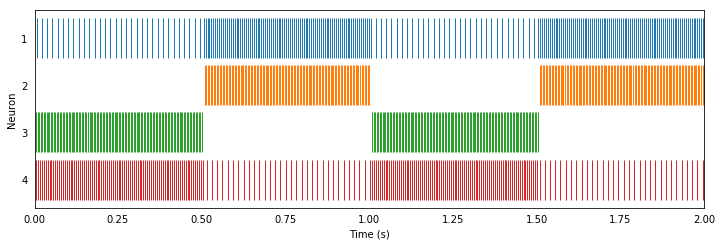

In [21]:
plt.figure(figsize=(12, 8))
win = int(2e3)

ax = plt.subplot(2, 1, 1)
rasterplot(fake_sim.trange()[:win], fake_sim.data[fake_model.p_spikes][:win], ax)
ax.set_ylabel('Neuron')
ax.set_xlabel('Time (s)')

Setting the baseline inhibition is a way to determine what minimum firing rate you want to see proportional to the maximum firing rate.